In [1]:
# Install necessary libraries
!pip install transformers datasets accelerate evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split

# Load the Financial PhraseBank dataset from Hugging Face
dataset = load_dataset("financial_phrasebank", "sentences_allagree")

# Examine the dataset structure
print(dataset)
print(dataset["train"].features)
print(dataset["train"][0])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2264
    })
})
{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'neutral', 'positive'], id=None)}
{'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 1}


In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(dataset["train"])

# Display class distribution
print(df['label'].value_counts())

# Split the dataset into train, validation, and test sets (70%, 15%, 15%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Convert back to the datasets format
from datasets import Dataset

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

label
1    1391
2     570
0     303
Name: count, dtype: int64
Training set size: 1584
Validation set size: 340
Test set size: 340


In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Choose a pre-trained model suitable for financial text
model_name = "distilbert-base-uncased"  # A good balance of performance and efficiency

# Alternatives:
# model_name = "bert-base-uncased"  # More powerful but slower
# model_name = "roberta-base"  # Often performs better on sentiment tasks
# model_name = "ProsusAI/finbert"  # Specialized for financial text

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load pre-trained model with classification head
num_labels = 3  # positive, negative, neutral
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
!pip show transformers

Name: transformers
Version: 4.51.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers


In [ ]:
!pip install --upgrade transformers

In [7]:
# Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding="max_length", truncation=True, max_length=128)

tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_val = val_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/1584 [00:00<?, ? examples/s]

Map:   0%|          | 0/340 [00:00<?, ? examples/s]

Map:   0%|          | 0/340 [00:00<?, ? examples/s]

In [9]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [10]:

# Now set up the training arguments
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    # For older versions, use these parameters:
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    # Add these if your version supports them:
    logging_steps=100,
    save_steps=500,
    eval_steps=500,
)

# Initialize the Trainer with the compute_metrics function
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # Now this is defined
)

<ipython-input-10-098a4fb59625>:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [12]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 20.7 MB/s eta 0:00:00


In [15]:
# Train the model
trainer.train()

# Save the model after training
trainer.save_model("./financial-sentiment-model")

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kavir4118 (kavir4118-northeastern-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,0.593800
200,0.140300
300,0.059100
400,0.033000


In [16]:
# Evaluate on the test set
test_results = trainer.evaluate(tokenized_test)
print(f"Test results: {test_results}")

Test results: {'eval_loss': 0.1515267938375473, 'eval_accuracy': 0.961764705882353, 'eval_f1': 0.9616118873584937, 'eval_precision': 0.9615329496727602, 'eval_recall': 0.961764705882353, 'eval_runtime': 87.8883, 'eval_samples_per_second': 3.869, 'eval_steps_per_second': 0.25, 'epoch': 5.0}


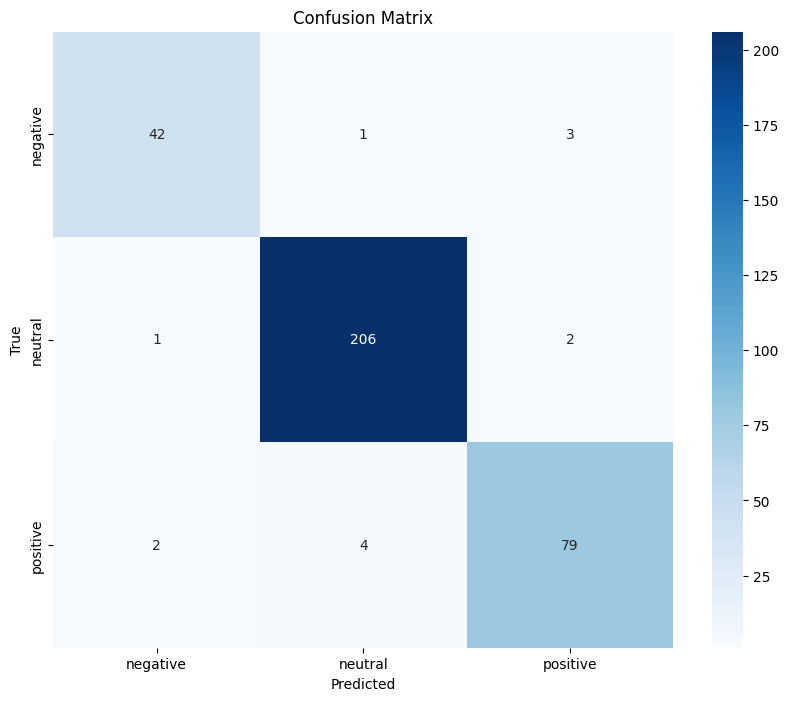

Total errors: 13 out of 340 examples (3.82%)

Sentence: The company reported a profit of 800,000 euro ($ 1.2 mln)on the sale of its Varesvuo Partners sub-group and a loss of 400,000 euro $ 623,000 caused by the sale of its program production subsidiary Oy Filmiteollisuus Fine Ab .
True label: neutral
Predicted label: negative
Confidence for negative: 0.4868
Confidence for neutral: 0.4692
Confidence for positive: 0.0441

Sentence: Net sales have been eaten by the weak US dollar .
True label: negative
Predicted label: neutral
Confidence for negative: 0.1437
Confidence for neutral: 0.8207
Confidence for positive: 0.0356

Sentence: No changes in media activity were seen in October compared with September .
True label: neutral
Predicted label: positive
Confidence for negative: 0.0638
Confidence for neutral: 0.0245
Confidence for positive: 0.9118

Sentence: Finnish power supply solutions and systems provider Efore Oyj said its net loss widened to 3.2 mln euro $ 4.2 mln for the first quarter 

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on test set
predictions = trainer.predict(tokenized_test)
pred_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = predictions.label_ids

# Create confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
label_names = ["negative", "neutral", "positive"]  # Adjust based on your dataset's label mapping

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Analyze specific examples where the model made mistakes
error_indices = [i for i, (true, pred) in enumerate(zip(true_labels, pred_labels)) if true != pred]

print(f"Total errors: {len(error_indices)} out of {len(true_labels)} examples ({len(error_indices)/len(true_labels)*100:.2f}%)")

# Examine some error examples
for i in error_indices[:5]:  # Show first 5 errors
    sentence = test_dataset[i]["sentence"]
    true_label = label_names[true_labels[i]]
    pred_label = label_names[pred_labels[i]]

    print(f"\nSentence: {sentence}")
    print(f"True label: {true_label}")
    print(f"Predicted label: {pred_label}")

    # Get prediction confidence
    logits = predictions.predictions[i]
    probs = np.exp(logits) / sum(np.exp(logits))
    for label, prob in zip(label_names, probs):
        print(f"Confidence for {label}: {prob:.4f}")

In [18]:
# Load a new instance of the pre-trained model (without fine-tuning)
from transformers import AutoModelForSequenceClassification

baseline_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    return_dict=True
)

# Create a new trainer with the baseline model
baseline_trainer = Trainer(
    model=baseline_model,
    args=training_args,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Evaluate the baseline model
baseline_results = baseline_trainer.evaluate()
print(f"Baseline results: {baseline_results}")

# Compare with fine-tuned model
print("\nComparison:")
print(f"Fine-tuned model accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Baseline model accuracy: {baseline_results['eval_accuracy']:.4f}")
print(f"Improvement: {test_results['eval_accuracy'] - baseline_results['eval_accuracy']:.4f}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-18-d7b25c11a7f0>:11: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  baseline_trainer = Trainer(


Baseline results: {'eval_loss': 1.116285800933838, 'eval_model_preparation_time': 0.0029, 'eval_accuracy': 0.25, 'eval_f1': 0.10538040808740558, 'eval_precision': 0.6770204224122884, 'eval_recall': 0.25, 'eval_runtime': 74.0947, 'eval_samples_per_second': 4.589, 'eval_steps_per_second': 0.297}

Comparison:
Fine-tuned model accuracy: 0.9618
Baseline model accuracy: 0.2500
Improvement: 0.7118


In [19]:
from transformers import pipeline

# Load the fine-tuned model for inference
sentiment_analyzer = pipeline(
    "text-classification",
    model="./financial-sentiment-model",
    tokenizer=tokenizer
)

# Function to analyze financial texts
def analyze_financial_sentiment(text):
    result = sentiment_analyzer(text)[0]
    label_id = int(result['label'].split('_')[-1])
    sentiment = ["negative", "neutral", "positive"][label_id]

    return {
        "text": text,
        "sentiment": sentiment,
        "confidence": result['score']
    }

# Test the inference pipeline with some examples
test_texts = [
    "The company reported a significant increase in quarterly profits.",
    "Stocks declined following the announcement of new regulations.",
    "The market showed mixed reactions to the latest economic data.",
    "The company's debt has increased to concerning levels.",
    "Investors remain cautious about the economic outlook."
]

for text in test_texts:
    result = analyze_financial_sentiment(text)
    print(f"Text: {result['text']}")
    print(f"Sentiment: {result['sentiment']}")
    print(f"Confidence: {result['confidence']:.4f}")
    print()

Device set to use cpu


Text: The company reported a significant increase in quarterly profits.
Sentiment: positive
Confidence: 0.9937

Text: Stocks declined following the announcement of new regulations.
Sentiment: negative
Confidence: 0.9907

Text: The market showed mixed reactions to the latest economic data.
Sentiment: negative
Confidence: 0.9800

Text: The company's debt has increased to concerning levels.
Sentiment: positive
Confidence: 0.9943

Text: Investors remain cautious about the economic outlook.
Sentiment: negative
Confidence: 0.8777



In [21]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


In [55]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline

from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

# Load model and tokenizer
model_path = "./financial-sentiment-model"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Manually define label mappings
model.config.id2label = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}
model.config.label2id = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

# Rebuild pipeline with label mapping
sentiment_analyzer = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True
)


# Function to create bar chart of sentiment probabilities
def create_sentiment_chart(text):
    text = text.strip()
    if not text:
        return None, "❌ Please enter some text to analyze."

    # Financial keyword check
    finance_keywords = [
        "stock", "earnings", "revenue", "margin", "profit", "loss", "quarter",
        "guidance", "forecast", "market", "growth", "dividend", "investment"
    ]
    if not any(keyword in text.lower() for keyword in finance_keywords):
        return None, "⚠️ This input doesn't appear financial — results may not be meaningful."

    try:
        result = sentiment_analyzer(text, return_all_scores=True)[0]
        labels = [r['label'] for r in result]
        scores = [r['score'] for r in result]

        if max(scores) < 0.6:
            return None, "🤔 The model is not confident about this prediction (low score)."

        # Create bar chart
        plt.figure(figsize=(8, 5))
        colors = ['#FF6B6B', '#4ECDC4', '#56C596']  # [Neg, Neut, Pos]
        plt.bar(labels, scores, color=colors[:len(scores)])
        plt.ylim(0, 1)
        plt.ylabel('Confidence Score')
        plt.title('Sentiment Analysis Results')

        for i, v in enumerate(scores):
            plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

        chart_path = "sentiment_chart.png"
        plt.tight_layout()
        plt.savefig(chart_path)
        plt.close()

        top_idx = np.argmax(scores)
        sentiment = labels[top_idx].capitalize()
        confidence = scores[top_idx]
        analysis = f"✅ Overall Sentiment: {sentiment} (Confidence: {confidence:.2f})"
        return chart_path, analysis

    except Exception as e:
        return None, f"❌ Error during prediction: {str(e)}"


# Create the interface
demo = gr.Interface(
    fn=create_sentiment_chart,
    inputs=[
        gr.Textbox(lines=4, placeholder="Enter financial text here...")
    ],
    outputs=[
        gr.Image(type="filepath", label="Sentiment Distribution"),
        gr.Textbox(label="Analysis")
    ],
    title="Financial Sentiment Analyzer",
    description="Analyze the sentiment of financial news and statements. The model classifies text as Positive, Neutral, or Negative.",
    examples=[
        ["The company reported a significant increase in quarterly profits."],
        ["Stocks declined following the announcement of new regulations."],
        ["The market showed mixed reactions to the latest economic data."],
        ["The company's debt has increased to concerning levels."],
        ["Investors remain cautious about the economic outlook."]
    ],
    theme="huggingface"
)

# Launch the interface
demo.launch(share=True)

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1114: UserWarning: Cannot load huggingface. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/huggingface (Request ID: Root=1-680841dd-07fee952766d9c2937472443;72a088d8-04b9-4059-a014-9cdd1a024349)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f4506f07fd5a9661a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [26]:
!pip install streamlit -q
!pip install pyngrok -q

In [35]:
!curl https://loca.lt/mytunnelpassword


34.106.81.117

In [ ]:


# # Create a file for the Streamlit app
# with open('app.py', 'w') as f:
#     f.write('''
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from transformers import pipeline

# # Page config
# st.set_page_config(
#     page_title="Financial Sentiment Analysis",
#     page_icon="💹",
#     layout="wide"
# )

# # Custom CSS
# st.markdown("""
# <style>
#     .main {
#         padding: 2rem;
#     }
#     .stTitle {
#         font-size: 3rem !important;
#         color: #0F52BA !important;
#     }
#     .sentiment-positive {
#         color: #27AE60;
#         font-weight: bold;
#     }
#     .sentiment-neutral {
#         color: #F39C12;
#         font-weight: bold;
#     }
#     .sentiment-negative {
#         color: #E74C3C;
#         font-weight: bold;
#     }
# </style>
# """, unsafe_allow_html=True)

# # Header
# st.title("Financial Sentiment Analysis")
# st.markdown("### Analyze sentiment in financial news and statements")

# # Load model
# try:
#     # Try to use a pretrained model for demo
#     sentiment_analyzer = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")
#     st.info("Using a pretrained model for demonstration purposes")
# except:
#     st.error("Failed to load the model. Please check your installation.")

# # Function to analyze sentiment
# def analyze_sentiment(text):
#     if not text:
#         return None, 0.0

#     result = sentiment_analyzer(text)[0]

#     # Handle different output formats
#     if 'label' in result:
#         label = result['label']
#         if label == "POSITIVE":
#             sentiment = "Positive"
#         elif label == "NEGATIVE":
#             sentiment = "Negative"
#         else:
#             sentiment = label

#         confidence = float(result['score'])
#         return sentiment, confidence
#     else:
#         return "Error", 0.0

# # Create tabs
# tab1, tab2 = st.tabs(["Analyze Text", "Examples"])

# with tab1:
#     # Input text area
#     text_input = st.text_area("Enter financial text to analyze:",
#                            height=150,
#                            placeholder="Example: The company reported quarterly earnings that exceeded analyst expectations...")

#     if st.button("Analyze Sentiment"):
#         if text_input:
#             sentiment, confidence = analyze_sentiment(text_input)

#             # Display results
#             st.markdown("### Analysis Results")

#             # Create columns for better layout
#             res_col1, res_col2 = st.columns([1, 1])

#             with res_col1:
#                 sentiment_class = f"sentiment-{sentiment.lower()}" if sentiment in ["Positive", "Neutral", "Negative"] else ""
#                 st.markdown(f"**Sentiment:** <span class='{sentiment_class}'>{sentiment}</span>", unsafe_allow_html=True)
#                 st.markdown(f"**Confidence:** {confidence:.2f}")

#             with res_col2:
#                 # Create a bar chart for probabilities
#                 fig, ax = plt.subplots(figsize=(5, 3))

#                 # For demo model that only gives positive/negative
#                 labels = ["Negative", "Positive"]
#                 values = [1-confidence if sentiment == "Positive" else confidence,
#                          confidence if sentiment == "Positive" else 1-confidence]
#                 colors = ["#E74C3C", "#27AE60"]

#                 ax.bar(labels, values, color=colors)
#                 ax.set_ylim(0, 1)
#                 ax.set_ylabel("Confidence")
#                 ax.set_title("Sentiment Probabilities")

#                 st.pyplot(fig)

# with tab2:
#     st.markdown("### Example Financial Statements")

#     # Positive examples
#     st.markdown("#### Positive Examples")
#     positive_examples = [
#         "The company reported quarterly earnings that exceeded analyst expectations by 15%, driving the stock price to an all-time high.",
#         "Investors responded enthusiastically to the new product launch, with shares climbing 8% in after-hours trading."
#     ]

#     for i, example in enumerate(positive_examples):
#         if st.button(f"Example P{i+1}", key=f"pos_{i}"):
#             st.session_state.text_input = example
#             sentiment, confidence = analyze_sentiment(example)

#             st.markdown("### Analysis Results")
#             st.markdown(f"**Sentiment:** <span class='sentiment-{sentiment.lower()}'>{sentiment}</span>", unsafe_allow_html=True)
#             st.markdown(f"**Confidence:** {confidence:.2f}")

#     # Negative examples
#     st.markdown("#### Negative Examples")
#     negative_examples = [
#         "The company missed revenue targets for the third consecutive quarter, leading to a sharp decline in market capitalization.",
#         "Profit margins contracted significantly due to rising material costs and ongoing supply chain disruptions."
#     ]

#     for i, example in enumerate(negative_examples):
#         if st.button(f"Example N{i+1}", key=f"neg_{i}"):
#             st.session_state.text_input = example
#             sentiment, confidence = analyze_sentiment(example)

#             st.markdown("### Analysis Results")
#             st.markdown(f"**Sentiment:** <span class='sentiment-{sentiment.lower()}'>{sentiment}</span>", unsafe_allow_html=True)
#             st.markdown(f"**Confidence:** {confidence:.2f}")

#     # Mixed/challenging examples
#     st.markdown("#### Mixed/Challenging Examples")
#     mixed_examples = [
#         "Despite missing earnings forecasts, the company's forward guidance suggests stronger performance in the coming quarters.",
#         "While revenue declined 3% year-over-year, aggressive cost-cutting measures preserved profitability."
#     ]

#     for i, example in enumerate(mixed_examples):
#         if st.button(f"Example M{i+1}", key=f"mix_{i}"):
#             st.session_state.text_input = example
#             sentiment, confidence = analyze_sentiment(example)

#             st.markdown("### Analysis Results")
#             st.markdown(f"**Sentiment:** <span class='sentiment-{sentiment.lower()}'>{sentiment}</span>", unsafe_allow_html=True)
#             st.markdown(f"**Confidence:** {confidence:.2f}")
# ''')

# # Run the streamlit app directly in Colab
# !streamlit run app.py & npx localtunnel --port 8501